# <center>Dispersive Flies Optimization</center>

## Import Libraries

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [144]:
data = pd.read_csv('data/Swarm_Behaviour.csv')

In [145]:
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


## Data Processing

#### Label Encoding

In [146]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data = data.apply(le.fit_transform)

In [147]:
data.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,10795,9519,240,735,100,98,372,351,253,245,...,83,100,100,356,332,212,226,28,0,0
1,8651,9096,1432,899,100,98,372,351,253,245,...,855,100,100,356,332,212,226,4,0,0
2,8774,6531,1596,558,100,98,372,351,271,219,...,346,100,100,356,332,201,196,15,1,0
3,9514,698,1286,2016,83,196,372,351,253,245,...,2108,74,194,356,332,212,226,16,0,0
4,15926,16031,1000,1922,0,193,372,351,253,245,...,2286,1,100,588,648,212,226,12,0,0


#### Feature Scaling

In [148]:
from sklearn import preprocessing
X = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(data_scaled)

In [149]:
df.columns = data.columns

In [150]:
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,0.634664,0.567249,0.105125,0.299389,0.546448,0.497462,0.529915,0.500713,0.513185,0.494949,...,0.034411,0.515464,0.507614,0.509299,0.501511,0.467991,0.475789,0.205882,0.000000,0.0
1,0.508613,0.542042,0.627245,0.366191,0.546448,0.497462,0.529915,0.500713,0.513185,0.494949,...,0.354478,0.515464,0.507614,0.509299,0.501511,0.467991,0.475789,0.029412,0.000000,0.0
2,0.515845,0.389190,0.699080,0.227291,0.546448,0.497462,0.529915,0.500713,0.549696,0.442424,...,0.143449,0.515464,0.507614,0.509299,0.501511,0.443709,0.412632,0.110294,0.015625,0.0
3,0.559351,0.041595,0.563294,0.821181,0.453552,0.994924,0.529915,0.500713,0.513185,0.494949,...,0.873964,0.381443,0.984772,0.509299,0.501511,0.467991,0.475789,0.117647,0.000000,0.0
4,0.936328,0.955307,0.438020,0.782892,0.000000,0.979695,0.529915,0.500713,0.513185,0.494949,...,0.947761,0.005155,0.507614,0.841202,0.978852,0.467991,0.475789,0.088235,0.000000,0.0


#### Define Target and Feature Variables

In [151]:
#feature variables
X = df.drop(['Swarm_Behaviour'], axis=1).values

#target variable
y = df['Swarm_Behaviour'].values

#### Train-Test Split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

## Data Analysis

In [153]:
df.shape

(23309, 2401)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2401)
memory usage: 427.0 MB


In [169]:
df["Swarm_Behaviour"].value_counts()

0.0    15355
1.0     7954
Name: Swarm_Behaviour, dtype: int64

C:\Users\syedi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Swarm_Behaviour', ylabel='count'>

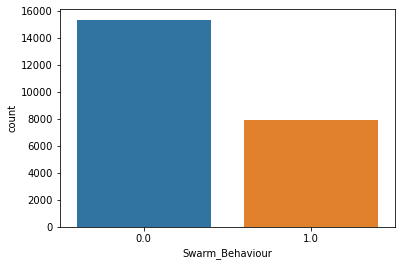

In [154]:
sns.countplot(df['Swarm_Behaviour'])

## Classification

### In this work, at first classification models has been applied without optimization
#### Classifier Used-
- Logistic Regression
- Support Vector Machine
- Decision Tree
- Random Forrest
- Neural Networks

In [155]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(solver='lbfgs', max_iter=2000)

# Support Vector Machines
from sklearn.svm import SVC
models['Support Vector Machines'] = SVC(kernel='linear')

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Neural Networks
from sklearn.neural_network import MLPClassifier
models['Neural Networks'] = MLPClassifier()

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

accuracy = {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)

In [159]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
df_model['Accuracy'] = accuracy.values()

df_model

,Accuracy
Logistic Regression,0.880023
Support Vector Machines,0.877020
Decision Trees,0.870299
Random Forest,0.871586
K-Nearest Neighbor,0.888460
Neural Networks,0.896897


## Implementation of DFO Algorithm

#### FITNESS FUNCTION (SPHERE FUNCTION)

In [16]:
def f(x): # x IS A VECTOR REPRESENTING ONE FLY
    sum = 0.0
    for i in range(len(x)):
        sum = sum + np.power(x[i],2)
    return sum

#### Set population size N, dimensionality D, disturbance threshold delta and iterations

In [17]:
N = X_train.shape[0] # POPULATION SIZE
D = X_train.shape[1] # DIMENSIONALITY 
delta = 0.005 # DISTURBANCE THRESHOLD 
maxIterations = 10 # ITERATIONS ALLOWED

#### PHASE INITIALIZATION

In [18]:
A = X_train # FLIES ARRAY OF SIZE: (N,D)
fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

#### MAIN DFO LOOP

In [19]:
for itr in range (maxIterations):
    for i in range(N): # EVALUATION
        fitness[i] = f(A[i,])
    s = np.argmin(fitness) # FIND BEST FLY

    if (itr%1 == 0): # PRINT BEST FOR EACH ITERATIONS
        print ("Iteration:", itr, "\tBest fly index:", s, 
               "\tFitness value:", fitness[s])

    # TAKE EACH FLY INDIVIDUALLY 
    for i in range(N): 
        if i == s: continue # ELITIST STRATEGY

        # FIND BEST NEIGHBOUR
        left = (i-1)%N
        right = (i+1)%N
        bNeighbour = right if fitness[right]<fitness[left] else left

        for d in range(D): # UPDATE EACH DIMENSION SEPARATELY 
            if (np.random.rand() < delta):
                A[i,d] = X_train[i,d]
                continue;

            u = np.random.rand()
            A[i,d] = A[bNeighbour,d] + u*(A[s,d] - A[i,d])

for i in range(N): fitness[i] = f(A[i,]) # EVALUATION
s = np.argmin(fitness) # FIND BEST FLY

print("\nFinal best fitness:\t", fitness[s])
print("\nBest fly position:\n",  A[s,])

Iteration: 0 	Best fly index: 1621 	Fitness value: 342.1912831564576
Iteration: 1 	Best fly index: 11807 	Fitness value: 304.0097161444953
Iteration: 2 	Best fly index: 6889 	Fitness value: 295.3430928056835
Iteration: 3 	Best fly index: 6889 	Fitness value: 295.3430928056835
Iteration: 4 	Best fly index: 6889 	Fitness value: 295.3430928056835
Iteration: 5 	Best fly index: 11773 	Fitness value: 286.1738100618825
Iteration: 6 	Best fly index: 11407 	Fitness value: 281.4794218077937
Iteration: 7 	Best fly index: 9836 	Fitness value: 278.9643081472484
Iteration: 8 	Best fly index: 13755 	Fitness value: 278.63163762885677
Iteration: 9 	Best fly index: 14937 	Fitness value: 276.305919836755

Final best fitness:	 274.02850753289965

Best fly position:
 [-0.08071899  0.18583313  0.09767602 ...  0.26194     0.19432933
 -0.00464412]


#### CONVERT FITNESS VALUES INTO ARRAYS

In [20]:
new_arr = []
for i in range(len(fitness)):
    new_arr.append([fitness[i]])

z_fitness = np.array(new_arr)
z_fitness

array([[317.1232107 ],
       [283.38470969],
       [277.26075448],
       ...,
       [278.2871478 ],
       [283.86178733],
       [308.36687642]])

## Feature Selection

#### DEFINE BINARY CONVERSION FUNCTION

In [117]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

#### FEATURE SELECTION USING FITNESS

In [121]:
# Best feature subset
dim = 2400
thres = 0.5
Gbin       = binary_conversion(A, thres, 1, dim) 
Gbin       = Gbin.reshape(dim)
pos        = np.asarray(range(0, dim))    
sel_index  = pos[Gbin == 1]
num_feat   = len(sel_index)
# Create dictionary
opt_data = {'sf': sel_index, 'nf': num_feat}

In [123]:
print(Gbin)
print(sel_index)
print(num_feat)

[0 0 0 ... 0 0 0]
[   6    7   12   13   17   20   21   31   32   36   42   43   55   60
   61   66   78   96  114  115  124  127  129  133  138  139  145  163
  165  168  175  186  187  193  198  199  210  211  217  223  229  241
  246  247  252  270  271  276  277  282  288  294  295  301  307  320
  321  336  342  354  362  372  373  379  391  393  408  414  415  420
  422  425  427  428  432  433  438  444  450  462  468  469  475  477
  493  499  511  523  525  536  547  548  564  571  583  588  602  606
  609  613  637  644  649  651  660  672  691  692  693  696  715  720
  727  744  745  749  750  757  775  787  788  792  799  801  804  810
  816  820  823  834  835  847  849  852  859  871  883  906  907  908
  912  919  925  930  960  967  992  997 1003 1008 1009 1015 1026 1027
 1032 1041 1045 1051 1062 1063 1064 1068 1074 1075 1086 1087 1093 1099
 1100 1101 1108 1117 1119 1125 1134 1135 1141 1147 1153 1159 1171 1176
 1185 1189 1197 1206 1207 1215 1224 1231 1232 1236 1237 124

In [124]:
opt_data['sf']

array([   6,    7,   12,   13,   17,   20,   21,   31,   32,   36,   42,
         43,   55,   60,   61,   66,   78,   96,  114,  115,  124,  127,
        129,  133,  138,  139,  145,  163,  165,  168,  175,  186,  187,
        193,  198,  199,  210,  211,  217,  223,  229,  241,  246,  247,
        252,  270,  271,  276,  277,  282,  288,  294,  295,  301,  307,
        320,  321,  336,  342,  354,  362,  372,  373,  379,  391,  393,
        408,  414,  415,  420,  422,  425,  427,  428,  432,  433,  438,
        444,  450,  462,  468,  469,  475,  477,  493,  499,  511,  523,
        525,  536,  547,  548,  564,  571,  583,  588,  602,  606,  609,
        613,  637,  644,  649,  651,  660,  672,  691,  692,  693,  696,
        715,  720,  727,  744,  745,  749,  750,  757,  775,  787,  788,
        792,  799,  801,  804,  810,  816,  820,  823,  834,  835,  847,
        849,  852,  859,  871,  883,  906,  907,  908,  912,  919,  925,
        930,  960,  967,  992,  997, 1003, 1008, 10

In [125]:
new_data = df.iloc[:,opt_data['sf']]

In [126]:
new_data

,xS1,yS1,x2,y2,yA2,xC2,yC2,yS3,xC3,x4,...,xC194,x195,yS195,x196,yS196,x197,xC197,yS199,xS200,yS200
0,0.529915,0.500713,0.375462,0.271498,0.517949,0.517312,0.498956,0.540453,0.516832,0.833502,...,0.514286,0.459487,0.510823,0.887644,0.580938,0.739924,0.540541,0.538462,0.509299,0.501511
1,0.529915,0.500713,0.452232,0.330157,0.517949,0.517312,0.498956,0.540453,0.516832,0.984734,...,0.514286,0.985774,0.841270,0.916933,0.363086,0.886775,0.540541,0.538462,0.509299,0.501511
2,0.529915,0.500713,0.066272,0.596891,0.517949,0.582485,0.505219,0.540453,0.542574,0.600475,...,0.491837,0.288602,0.510823,0.668979,0.580938,0.495627,0.556306,0.538462,0.509299,0.501511
3,0.529915,0.500713,0.459562,0.792044,1.000000,0.517312,0.498956,0.540453,0.516832,0.247164,...,0.514286,0.443661,0.510823,0.624333,0.580938,0.583146,0.540541,0.538462,0.509299,0.501511
4,0.529915,0.500713,0.224034,0.143699,0.517949,0.517312,0.498956,0.540453,0.516832,0.217048,...,0.514286,0.012744,0.510823,0.544765,0.003026,0.086160,0.540541,0.538462,0.841202,0.978852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,0.529915,0.500713,0.010146,0.035553,0.005128,0.517312,0.498956,0.540453,0.516832,0.251797,...,0.514286,0.163061,0.510823,0.491877,0.580938,0.443978,0.540541,0.538462,0.148784,0.533233
23305,0.529915,0.500713,0.644009,0.713554,0.153846,0.517312,0.494781,0.540453,0.518812,0.504841,...,0.514286,0.374904,0.510823,0.213329,0.441755,0.924418,0.495495,0.354396,0.509299,0.501511
23306,0.529915,0.500713,0.363615,0.049607,0.517949,0.517312,0.498956,0.540453,0.516832,0.677042,...,0.514286,0.372296,0.510823,0.801850,0.580938,0.458220,0.540541,0.538462,0.509299,0.501511
23307,0.529915,0.500713,0.037359,0.151441,0.517949,0.517312,0.498956,0.540453,0.516832,0.673953,...,0.514286,0.163357,0.510823,0.477054,0.580938,0.611630,0.540541,0.975275,0.509299,0.501511


## Classification after Optimization

In [127]:
#feature variables
X = new_data.values

#target variable
y = df['Swarm_Behaviour'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

print("Shape of X_train:", X.shape)
print("Shape of y_train:", y.shape)

Shape of X_train: (23309, 375)
Shape of y_train: (23309,)


In [128]:
models1 = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models1['Logistic Regression'] = LogisticRegression(solver='lbfgs', max_iter=2000)

# Support Vector Machines
from sklearn.svm import SVC
models1['Support Vector Machines'] = SVC(kernel='linear')

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models1['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models1['Random Forest'] = RandomForestClassifier()


# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models1['K-Nearest Neighbor'] = KNeighborsClassifier()

# Neural Networks
from sklearn.neural_network import MLPClassifier
models1['Neural Networks'] = MLPClassifier()


In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

accuracy1 = {}

for key in models1.keys():
    
    # Fit the classifier
    models1[key].fit(X_train, y_train)
    
#     # Make predictions
     predictions1 = models1[key].predict(X_test)
    
#     # Calculate metrics
     accuracy1[key] = accuracy_score(predictions1, y_test)

In [158]:
df_model1 = pd.DataFrame(index=models1.keys(), columns=['Accuracy'])
df_model1['Accuracy'] = accuracy1.values()

df_model1

,Accuracy
Logistic Regression,0.901473
Support Vector Machines,0.897469
Decision Trees,0.870442
Random Forest,0.868583
K-Nearest Neighbor,0.889890
Neural Networks,0.893751


In [164]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)


In [165]:
display_side_by_side(df_model,df_model1, titles=['Classification without DFO','Classification with DFO'])

,Accuracy
Logistic Regression,0.880023
Support Vector Machines,0.877020
Decision Trees,0.870299
Random Forest,0.871586
K-Nearest Neighbor,0.888460
Neural Networks,0.896897
,Accuracy
Logistic Regression,0.901473
Support Vector Machines,0.897469
Decision Trees,0.870442
